# Vergleichswerte mit einem Spieler
wenn das Ziel nicht genau getroffen werden muss, also man z.B. auch mit einer 4 von Feld 14 ins Ziel kommt.

In [4]:
import locale

import numpy as np

from helpers import colorboxplot, makeHistogram, zeichneErrechnetenWert, colors, setup_grid
from src.codeGameSimulation.store2db import getDataFromDB, getSettingsFromDB


# %config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle

locale.setlocale(locale.LC_NUMERIC, "german")

mplstyle.use("fast")
mplstyle.use("default")
# mpl.rcParams['figure.figsize'] = [20, 10]




Pfad aus dem die Datenbanken geladen werden sollen.

In [5]:
db_dir = "D:/Uni/BA/data/"
db_filename = "gameHistories_not_exact"

Lade Daten aus der Datenbank

In [6]:
_, roundCounts, stepCounts, winners, settingsIDs = getDataFromDB(db_dir, db_filename)
settings = getSettingsFromDB(db_dir,db_filename)

db load finished after 0:01:12.576701
sort finished after 0:00:01.859418
groupby finished after 0:00:02.432548
sort finished after 0:00:08.479909
split finished after 0:01:12.996431
settings loaded


Erstelle Label basierend auf den Einstellungen des jeweiligen Testsets

In [7]:
labels_unordered = [" vs ".join(["{} Stein{}".format(
    p.getStoneCount(), "e"[:p.getStoneCount() ^ 1]) for p in s[1]]) for s in settings]
labels = [labels_unordered[i] for i in settingsIDs]
labels


['1 Stein',
 '2 Steine',
 '3 Steine',
 '4 Steine',
 '5 Steine',
 '6 Steine',
 '7 Steine']

## Ein Spielstein

### Züge

False


Text(0.5, 0, 'empirisch bestimmte Spiellänge in Zügen')

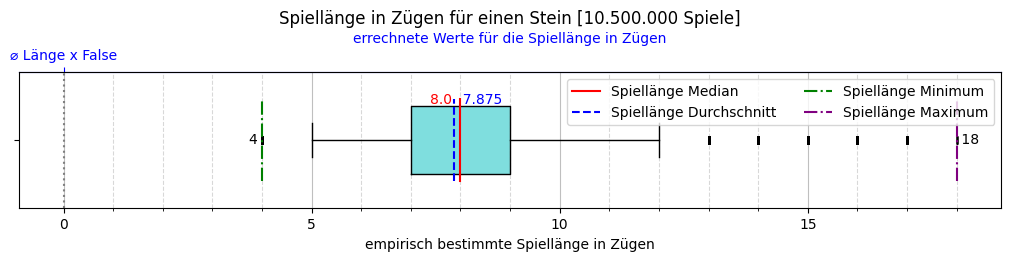

In [8]:
sc = stepCounts[0]
figSteps1p1s, ax = plt.subplot_mosaic([["Boxplots"]], figsize=[
    10, 2.5], layout="constrained")
zeichneErrechnetenWert(ax["Boxplots"], "s", False)
colorboxplot([sc], ax["Boxplots"], [""], colors[0])
ax["Boxplots"].set_title(
    "Spiellänge in Zügen für einen Stein [{0:n} Spiele]".format(len(sc), grouping=True))
ax["Boxplots"].set_xlabel(
    'empirisch bestimmte Spiellänge in Zügen')


Durchschnittliche Spiellänge in Schritte für einen Spielstein bei einem Spieler

In [9]:
sc = stepCounts[0]
{"⌀": np.mean(sc), "min": np.min(sc), "max": np.max(sc),
 "p1": np.percentile(sc, 1),
 "p25": np.percentile(sc, 25),
 "p50": np.percentile(sc, 50),
 "p75": np.percentile(sc, 75),
 "p99": np.percentile(sc, 99),
 "min_count": sc.count(np.min(sc)),
 "max_count": sc.count(np.max(sc)),
 }

{'⌀': 7.874685047619048,
 'min': 4,
 'max': 18,
 'p1': 5.0,
 'p25': 7.0,
 'p50': 8.0,
 'p75': 9.0,
 'p99': 12.0,
 'min_count': 2628,
 'max_count': 7}

### Runden

Text(0.5, 0, 'empirisch bestimmte Spiellänge in Runden')

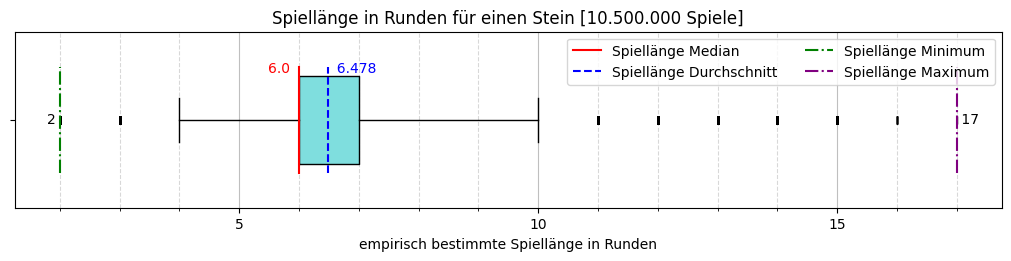

In [10]:
rc = roundCounts[0]
figRounds1p1s, ax = plt.subplot_mosaic([["Boxplots Runden"]], figsize=[
    10, 2.5], layout="constrained")
# ax2 = plt.twinx(ax["Boxplots Runden"])
# makeHistogram(ax2,[rc],[""],colors[0],fill=False)
# ax2.set_ylabel("Wahrschenlichkeit")
# zeichneErrechnetenWert(ax["Boxplots Runden"],"r")

colorboxplot([rc], ax["Boxplots Runden"], [""], colors[0])
ax["Boxplots Runden"].set_title(
    "Spiellänge in Runden für einen Stein [{0:n} Spiele]".format(len(rc), grouping=True))
ax["Boxplots Runden"].set_xlabel('empirisch bestimmte Spiellänge in Runden')


Durchschnittliche Spiellänge in Runden für einen Spielstein bei einem Spieler

In [11]:
rc = roundCounts[0]
{"⌀": np.mean(rc), "min": np.min(rc), "max": np.max(rc),
 "p1": np.percentile(rc, 1),
 "p25": np.percentile(rc, 25),
 "p50": np.percentile(rc, 50),
 "p75": np.percentile(rc, 75),
 "p99": np.percentile(rc, 99),
 "min_count": rc.count(np.min(rc)),
 "max_count": rc.count(np.max(rc)),
 }


{'⌀': 6.47809180952381,
 'min': 2,
 'max': 17,
 'p1': 4.0,
 'p25': 6.0,
 'p50': 6.0,
 'p75': 7.0,
 'p99': 10.0,
 'min_count': 5470,
 'max_count': 1}

## 7 Spielsteine

7


Text(0.5, 1.0, 'Spiellänge in Zügen für sieben Steine [1.500.000 Spiele]')

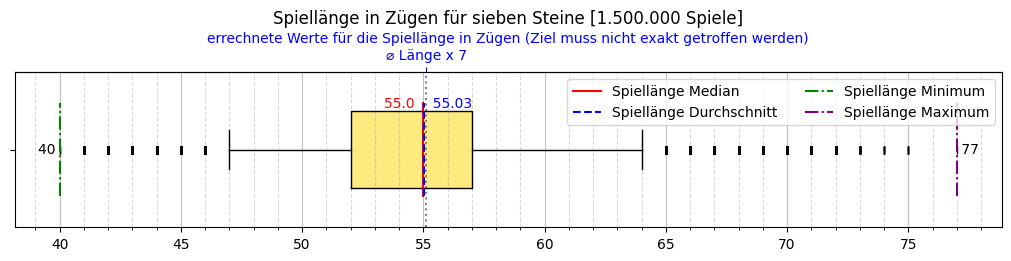

In [12]:
sc = stepCounts[6]
figSteps1p7s, ax = plt.subplot_mosaic([["Boxplots"]], figsize=[
    10, 2.5], layout="constrained")
zeichneErrechnetenWert(ax["Boxplots"], "s", 7,False)
colorboxplot([sc], ax["Boxplots"], [""], [colors[6]])
ax["Boxplots"].set_title(
    "Spiellänge in Zügen für sieben Steine [{0:n} Spiele]".format(len(sc), grouping=True))


In [13]:
sc = stepCounts[6]
{"⌀": np.mean(sc), "min": np.min(sc), "max": np.max(sc),
 "p1": np.percentile(sc, 1),
 "p25": np.percentile(sc, 25),
 "p50": np.percentile(sc, 50),
 "p75": np.percentile(sc, 75),
 "p99": np.percentile(sc, 99),
 "min_count": sc.count(np.min(sc)),
 "max_count": sc.count(np.max(sc)),
 }


{'⌀': 55.034948,
 'min': 40,
 'max': 77,
 'p1': 47.0,
 'p25': 52.0,
 'p50': 55.0,
 'p75': 57.0,
 'p99': 64.0,
 'min_count': 2,
 'max_count': 1}

### Runden

7


Text(0.5, 1.0, 'Spiellänge in Runden für sieben Steine [1.500.000 Spiele]')

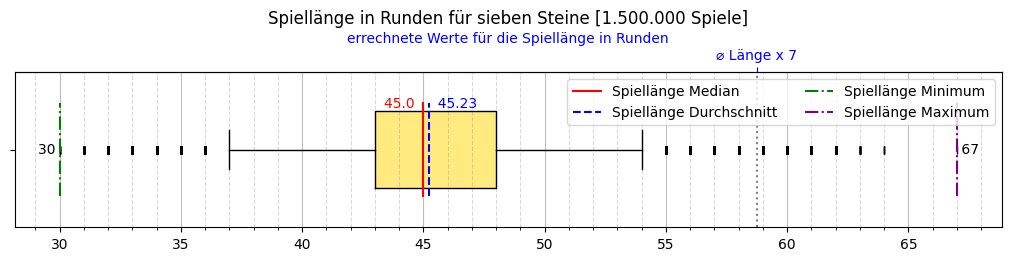

In [14]:
rc = roundCounts[6]
figRounds1p7s, ax = plt.subplot_mosaic([["Boxplots Runden"]], figsize=[
    10, 2.5], layout="constrained")
zeichneErrechnetenWert(ax["Boxplots Runden"], "r",7)
colorboxplot([rc], ax["Boxplots Runden"], [""], [colors[6]])
ax["Boxplots Runden"].set_title(
    "Spiellänge in Runden für sieben Steine [{0:n} Spiele]".format(len(sc), grouping=True))


In [15]:
rc = roundCounts[6]
{"⌀": np.mean(rc), "min": np.min(rc), "max": np.max(rc),
 "p1": np.percentile(rc, 1),
 "p25": np.percentile(rc, 25),
 "p50": np.percentile(rc, 50),
 "p75": np.percentile(rc, 75),
 "p99": np.percentile(rc, 99),
 "min_count": rc.count(np.min(rc)),
 "max_count": rc.count(np.max(rc)),
 }


{'⌀': 45.2251,
 'min': 30,
 'max': 67,
 'p1': 37.0,
 'p25': 43.0,
 'p50': 45.0,
 'p75': 48.0,
 'p99': 54.0,
 'min_count': 5,
 'max_count': 1}

## Alle Spielsteine 

1
2
3
4
5
6
7


Text(0.5, 1.0, 'Kein genauer Zielwurf: Spiellänge in Zügen [1.500.000 Spiele]')

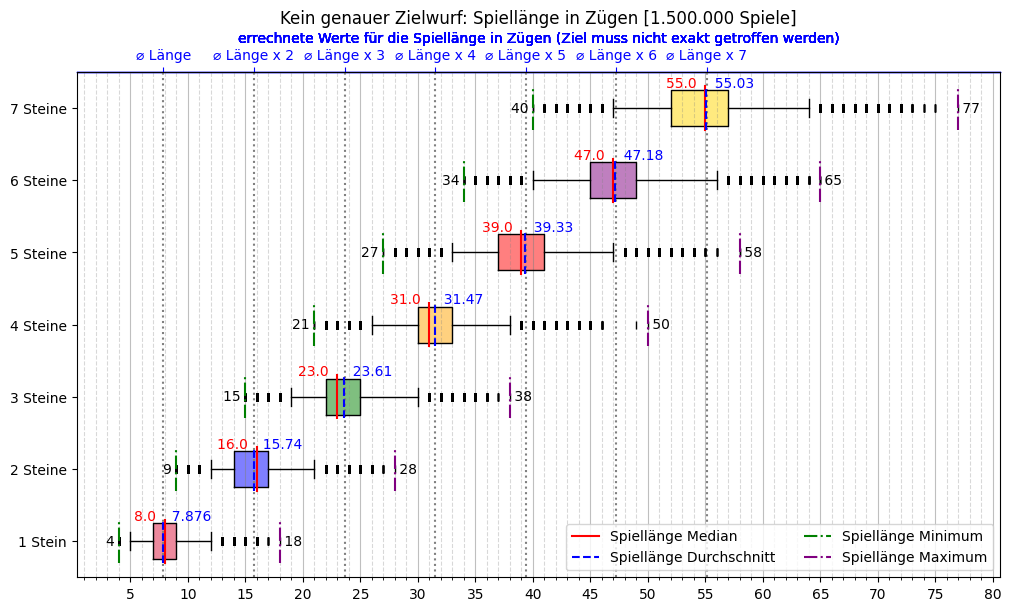

In [16]:
minlen = min([len(hset) for hset in stepCounts])
sc = [hset[:minlen] for hset in stepCounts]

figSteps1pAlls, ax = plt.subplot_mosaic([["Boxplots"]], figsize=[
    10, 6], layout="constrained")

[zeichneErrechnetenWert(ax["Boxplots"], "s", i, False)for i in range(1,8)]
colorboxplot(sc, ax["Boxplots"], labels, colors)
ax["Boxplots"].set_title(
    "Kein genauer Zielwurf: Spiellänge in Zügen [{0:n} Spiele]".format(minlen, grouping=True))


### Runden

Text(0.5, 1.0, 'Spiellänge in Runden [1.500.000 Spiele]')

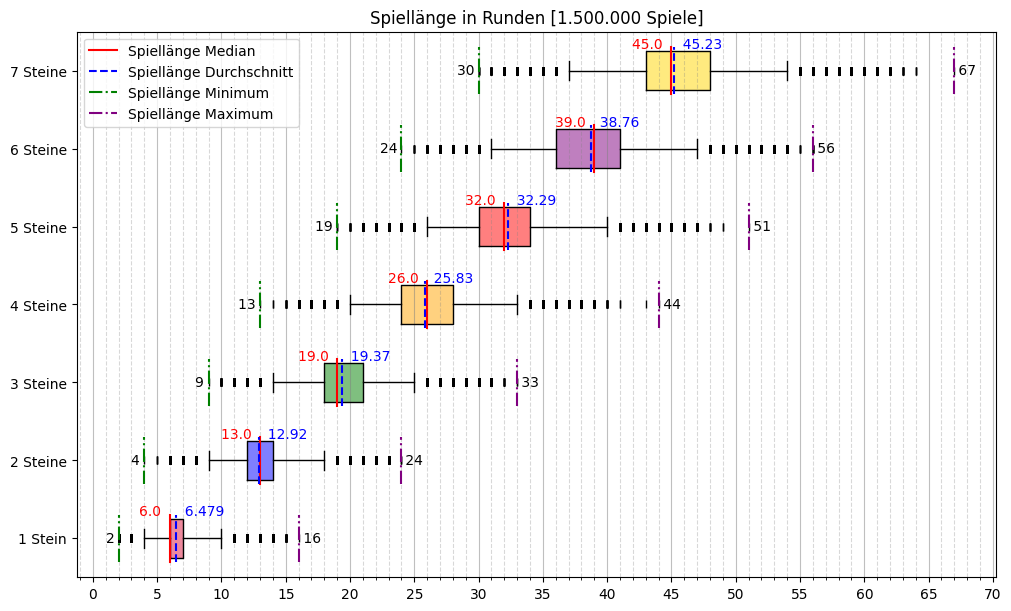

In [17]:
minlen = min([len(hset) for hset in roundCounts])
rc = [hset[:minlen] for hset in roundCounts]

figRounds1pAlls, ax = plt.subplot_mosaic([["Boxplots"]], figsize=[
    10, 6], layout="constrained")
colorboxplot(rc, ax["Boxplots"], labels, colors,ncol=1)
ax["Boxplots"].set_title(
    "Spiellänge in Runden [{0:n} Spiele]".format(minlen, grouping=True))


## Alle Spielsteine Durchschnittliche Zeit einen Stein ins Ziel zu bringen

1


(0.0, 25.0)

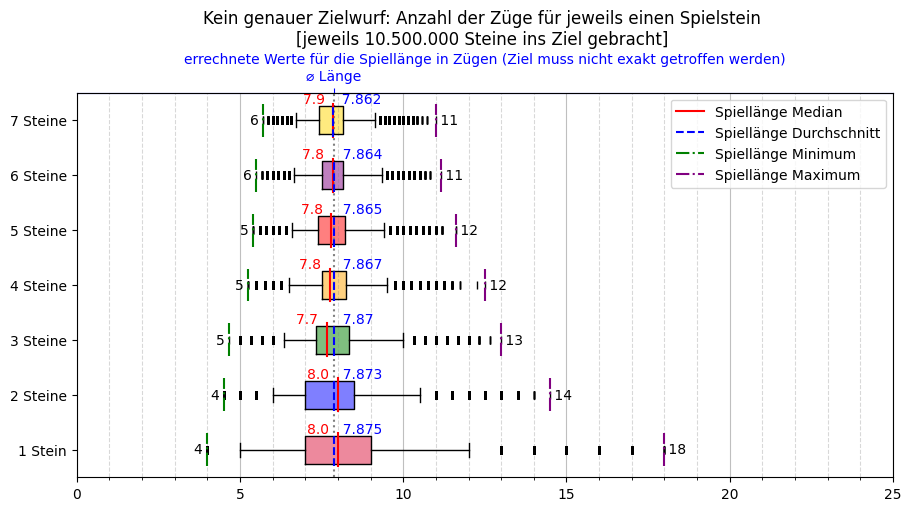

In [39]:
sc = [[gl/(i+1) for gl in hset] for i,hset in enumerate(stepCounts)]

figSteps1pStoneAvg, ax = plt.subplot_mosaic([["Boxplots"]], figsize=[9 , 5], layout="constrained")
zeichneErrechnetenWert(ax["Boxplots"], "s",1 , False)
colorboxplot(sc, ax["Boxplots"], labels, colors,ncol=1)
ax["Boxplots"].set_title( "Kein genauer Zielwurf: Anzahl der Züge für jeweils einen Spielstein \n[jeweils {0:n} Steine ins Ziel gebracht] ".format(len(stepCounts[0]), grouping=True))
ax["Boxplots"].set_xlim((0, 25))


### Runden

1


Text(0.5, 1.0, 'Anzahl der Runden für jeweils einen Spielstein [jeweils 10.500.000 Steine ins Ziel gebracht]')

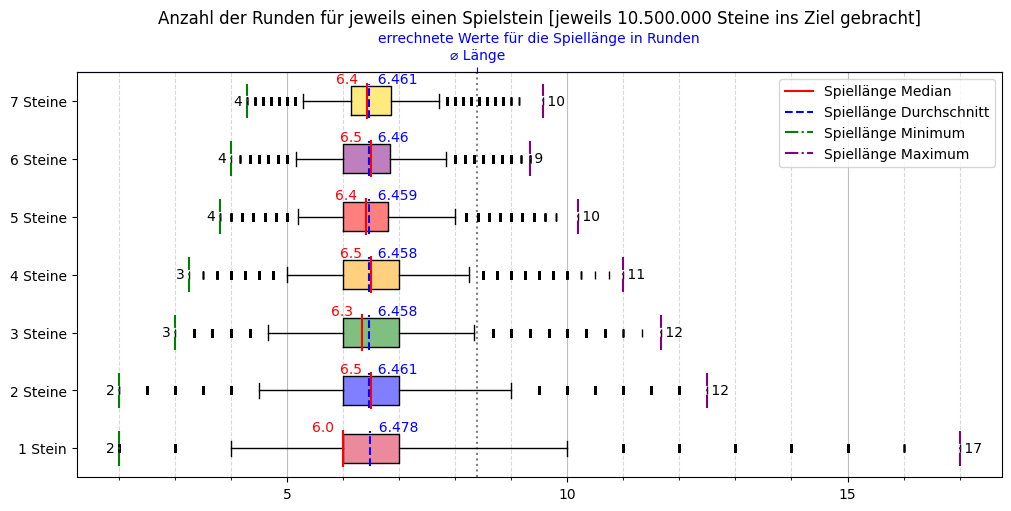

In [36]:
rc = [[gl/(i+1) for gl in hset] for i, hset in enumerate(roundCounts)]

figRounds1pStoneAvg, ax = plt.subplot_mosaic([["Boxplots Runden"]], figsize=[
   10, 5], layout="constrained")
zeichneErrechnetenWert(ax["Boxplots Runden"], "r")
colorboxplot(rc, ax["Boxplots Runden"], labels, colors,ncol=1)
ax["Boxplots Runden"].set_title(
    "Anzahl der Runden für jeweils einen Spielstein [jeweils {0:n} Steine ins Ziel gebracht]".format(len(roundCounts[0]), grouping=True))


### Züge

Text(0.5, 1.0, 'Anzahl der Runden für jeweils einen Spielstein [jeweils 10.500.000 Steine ins Ziel gebracht]')

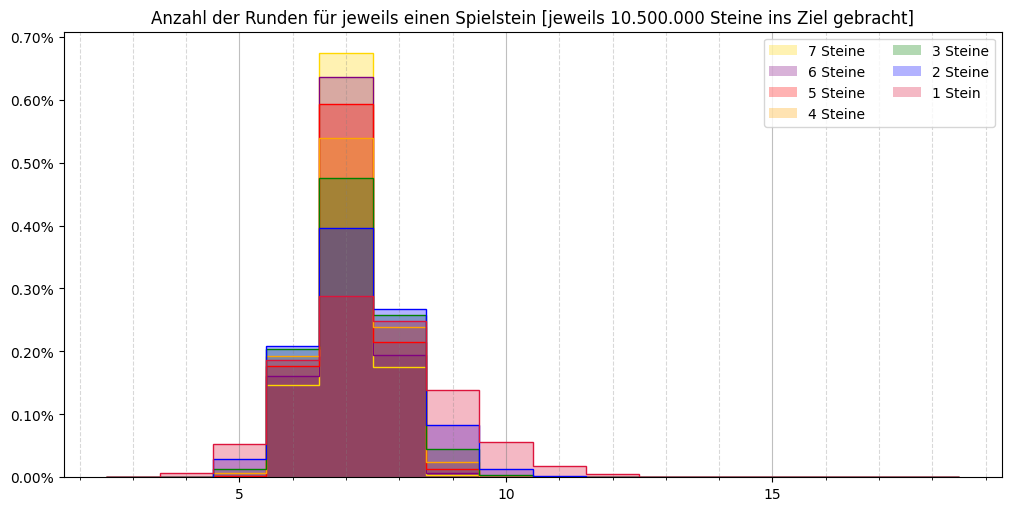

In [37]:
figRounds1pStoneAvgHist, ax = plt.subplot_mosaic([["Boxplots"]], figsize=[
    10, 5], layout="constrained")
makeHistogram(rc, ax["Boxplots"], labels, colors)
ax["Boxplots"].set_title(
    "Anzahl der Runden für jeweils einen Spielstein [jeweils {0:n} Steine ins Ziel gebracht]".format(len(roundCounts[0]), grouping=True))


## Speichern der Grafiken

In [40]:
# figSteps1p1s.savefig( "../../tex/game_ur_ba_thesis/img/Grafiken/Baseline/1s1pSchritte.png", dpi=300,)
# figSteps1p7s.savefig( "../../tex/game_ur_ba_thesis/img/Grafiken/Baseline/7s1pSchritte.png", dpi=300,)
# figSteps1pAlls.savefig( "../../tex/game_ur_ba_thesis/img/Grafiken/Baseline/Alls1pSchritteNotExact.png", dpi=300,)
figSteps1pStoneAvg.savefig( "../../tex/game_ur_ba_thesis/img/Grafiken/Baseline/Avgs1pSchritteNotExact.png", dpi=300,)

# figRounds1p1s.savefig( "../../tex/game_ur_ba_thesis/img/Grafiken/Baseline/1s1pRunden.png", dpi=300,)
# figRounds1p7s.savefig( "../../tex/game_ur_ba_thesis/img/Grafiken/Baseline/7s1pRunden.png", dpi=300,)
# figRounds1pAlls.savefig( "../../tex/game_ur_ba_thesis/img/Grafiken/Baseline/Alls1pRundenNotExact.png", dpi=300,)
# figRounds1pStoneAvg.savefig( "../../tex/game_ur_ba_thesis/img/Grafiken/Baseline/Avgs1pRundenNotExact.png", dpi=300,)
